Import python libraries required for the script

In [1]:
import pandas as pd

df = pd.read_csv('VMI_Data_BP1_V02_AK6_mod01.csv')

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import time

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import tree
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB

Read the CSV files

In [2]:
df = df.drop(['ID', 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE','LFT_SPLICE_LENGTH', 
              'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW', 'SPLICE_LIMIT_HIGH',
              'SPLICE_OK','BP1_PART', 'BP1_BARCODE', 'BP1_BUILD_DATE', 'BP1_MACHINEID','LFT_SPLICE_GRADE',
              'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE'], axis=1)

print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L',
       'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML',
       'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R',
       'BP1_S7_R', 'BP1_S8_R', 'BP1_LENGTH', 'LFT_SPLICE_DELTA',
       'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
       'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5',
       'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50',
       'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
       'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
       'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50', 'SPLICE_GRADE'],
      dtype='object')


Check the columns in the data

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                  Total   Percent
SPLICE_GRADE          1  0.000846
BP1_S3_R              0  0.000000
LFT_SPLICE_MA10       0  0.000000
LFT_SPLICE_MA5        0  0.000000
LFT_SPLICE_PREV       0  0.000000
LFT_SPLICE_DELTA      0  0.000000
BP1_LENGTH            0  0.000000
BP1_S8_R              0  0.000000
BP1_S7_R              0  0.000000
BP1_S6_R              0  0.000000


In [4]:
df[(df['SPLICE_GRADE']=="Good")]=2
df[(df['SPLICE_GRADE']=="OK")]=1
df[(df['SPLICE_GRADE']=="Bad")]=0
# df.head

In [5]:
#Cv
from sklearn.model_selection import train_test_split

features = df.drop(['SPLICE_GRADE'], axis=1)
labels = df['SPLICE_GRADE']
labels = labels.astype('int')

# Training/ Test Split
x1,x2,y1,y2 =train_test_split(features, labels, random_state=0, train_size =0.7, test_size=0.3)

#print the shape of training and test splits .50 
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)


(82784, 49)
(35479, 49)
(82784,)
(35479,)


In [6]:
# from sklearn.svm import LinearSVC
# clf = LinearSVC(random_state=0, tol=1e-5)

# X = df.drop(['SPLICE_GRADE'], axis=1)
# y = df['SPLICE_GRADE']
# y=y.astype('int')

# clf.fit(X, y)
# LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=10000,
#      multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

# print(clf.coef_)

# print(clf.intercept_)

# print(clf.predict([[0, 0, 0, 0]]))

In [7]:
#Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report

# Initialize our classifiers
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression(solver='lbfgs', multi_class='multinomial')
SDG = SGDClassifier(max_iter=1000, tol=0.001)
SVC = SVC(gamma='scale')
LSVC = LinearSVC(max_iter=2000, tol=0.001)
NSVC = NuSVC()



In [8]:
# Train our classifier and test predict
gnb.fit(x1, y1)
# print("GaussianNB Score :", gnb.score(x2, y2))
y2_GNB_model = gnb.predict(x2)
print("GaussianNB Accuracy :", accuracy_score(y2, y2_GNB_model))

BNB.fit(x1,y1)
# print("BNB Score :", BNB.score(x2, y2))
y2_BNB_model = BNB.predict(x2)
print("BNB Accuracy :", accuracy_score(y2, y2_BNB_model))

LR.fit(x1,y1)
# print("LR Score :", LR.score(x2, y2))
y2_LR_model = LR.predict(x2)
print("LR Accuracy :", accuracy_score(y2, y2_LR_model))

SDG.fit(x1,y1)
# print("SDG Score :", SDG.score(x2, y2))
y2_SDG_model = SDG.predict(x2)
print("SDG Accuracy :", accuracy_score(y2, y2_SDG_model))

SVC.fit(x1,y1)
# print("SVC Score :", SVC.score(x2, y2))
y2_SVC_model = SVC.predict(x2)
print("SVC Accuracy :", accuracy_score(y2, y2_SVC_model))

MNB.fit(x1,y1)
y2_MNB_model = MNB.predict(x2)
print("MNB Accuracy :", accuracy_score(y2, y2_MNB_model))

LSVC.fit(x1,y1)
y2_LSVC_model = LSVC.predict(x2)
print("LSVC Accuracy :", accuracy_score(y2, y2_LSVC_model))

KNN.fit(x1,y1)
# print("KNN Score :", KNN.score(x2, y2))
y2_KNN_model = KNN.predict(x2)
print("KNN Accuracy :", accuracy_score(y2, y2_KNN_model))


GaussianNB Accuracy : 1.0
BNB Accuracy : 0.9779306068378477
LR Accuracy : 1.0
SDG Accuracy : 1.0
SVC Accuracy : 1.0
MNB Accuracy : 0.7922996702274585


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LSVC Accuracy : 0.9779306068378477
KNN Accuracy : 1.0


In [9]:

# NSVC.fit(x1,y1)
# y2_NSVC_model = NSVC.predict(x2)
# print("NSVC Accuracy :", accuracy_score(y2, y2_NSVC_model))

In [10]:
df = df.drop(['LFT_SPLICE_DELTA', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
              'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5',
              'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50',
              'MID_SPLICE_DELTA', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
              'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
              'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',  'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 
              'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
              'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'], axis=1)

print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L',
       'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML',
       'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R',
       'BP1_S7_R', 'BP1_S8_R', 'BP1_LENGTH', 'LFT_SPLICE_PREV',
       'MID_SPLICE_PREV', 'RHT_SPLICE_PREV', 'SPLICE_GRADE'],
      dtype='object')


In [11]:
features = df.drop(['SPLICE_GRADE'], axis=1)
labels = df['SPLICE_GRADE']
labels = labels.astype('int')

# Training/ Test Split
x1,x2,y1,y2 =train_test_split(features, labels, random_state=0, train_size =0.7, test_size=0.3)

#print the shape of training and test splits .50 
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)


(82784, 22)
(35479, 22)
(82784,)
(35479,)


In [12]:
# Train our classifier and test predict
gnb.fit(x1, y1)
# print("GaussianNB Score :", gnb.score(x2, y2))
y2_GNB_model = gnb.predict(x2)
print("GaussianNB Accuracy :", accuracy_score(y2, y2_GNB_model))

BNB.fit(x1,y1)
# print("BNB Score :", BNB.score(x2, y2))
y2_BNB_model = BNB.predict(x2)
print("BNB Accuracy :", accuracy_score(y2, y2_BNB_model))

LR.fit(x1,y1)
# print("LR Score :", LR.score(x2, y2))
y2_LR_model = LR.predict(x2)
print("LR Accuracy :", accuracy_score(y2, y2_LR_model))

SDG.fit(x1,y1)
# print("SDG Score :", SDG.score(x2, y2))
y2_SDG_model = SDG.predict(x2)
print("SDG Accuracy :", accuracy_score(y2, y2_SDG_model))

SVC.fit(x1,y1)
# print("SVC Score :", SVC.score(x2, y2))
y2_SVC_model = SVC.predict(x2)
print("SVC Accuracy :", accuracy_score(y2, y2_SVC_model))

MNB.fit(x1,y1)
y2_MNB_model = MNB.predict(x2)
print("MNB Accuracy :", accuracy_score(y2, y2_MNB_model))

LSVC.fit(x1,y1)
y2_LSVC_model = LSVC.predict(x2)
print("LSVC Accuracy :", accuracy_score(y2, y2_LSVC_model))

KNN.fit(x1,y1)
# print("KNN Score :", KNN.score(x2, y2))
y2_KNN_model = KNN.predict(x2)
print("KNN Accuracy :", accuracy_score(y2, y2_KNN_model))


GaussianNB Accuracy : 1.0
BNB Accuracy : 0.9779306068378477
LR Accuracy : 1.0
SDG Accuracy : 0.9779306068378477
SVC Accuracy : 1.0
MNB Accuracy : 0.7922996702274585
LSVC Accuracy : 0.9779306068378477
KNN Accuracy : 1.0


In [13]:

# NSVC.fit(x1,y1)
# y2_NSVC_model = NSVC.predict(x2)
# print("NSVC Accuracy :", accuracy_score(y2, y2_NSVC_model))

In [14]:
target_names = ['Bad', 'OK', 'Good']
print(classification_report(y2, y2_LR_model, target_names=target_names, sample_weight=None, digits=4))

              precision    recall  f1-score   support

         Bad     1.0000    1.0000    1.0000      6586
          OK     1.0000    1.0000    1.0000     28110
        Good     1.0000    1.0000    1.0000       783

   micro avg     1.0000    1.0000    1.0000     35479
   macro avg     1.0000    1.0000    1.0000     35479
weighted avg     1.0000    1.0000    1.0000     35479



In [15]:
target_names = ['Bad', 'OK', 'Good']
print(classification_report(y2, y2_SVC_model, target_names=target_names, sample_weight=None, digits=4))

              precision    recall  f1-score   support

         Bad     1.0000    1.0000    1.0000      6586
          OK     1.0000    1.0000    1.0000     28110
        Good     1.0000    1.0000    1.0000       783

   micro avg     1.0000    1.0000    1.0000     35479
   macro avg     1.0000    1.0000    1.0000     35479
weighted avg     1.0000    1.0000    1.0000     35479



In [16]:
# target_names = ['Bad', 'OK', 'Good']
print(classification_report(y2, y2_KNN_model, target_names=target_names, sample_weight=None, digits=4))


              precision    recall  f1-score   support

         Bad     1.0000    1.0000    1.0000      6586
          OK     1.0000    1.0000    1.0000     28110
        Good     1.0000    1.0000    1.0000       783

   micro avg     1.0000    1.0000    1.0000     35479
   macro avg     1.0000    1.0000    1.0000     35479
weighted avg     1.0000    1.0000    1.0000     35479



In [17]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC

class_names = target_names
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[ 6586     0     0]
 [    0 28110     0]
 [    0     0   783]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


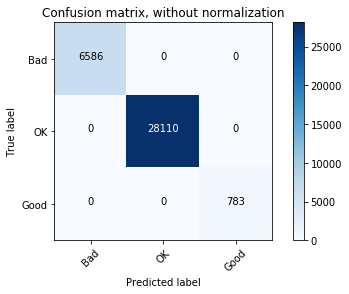

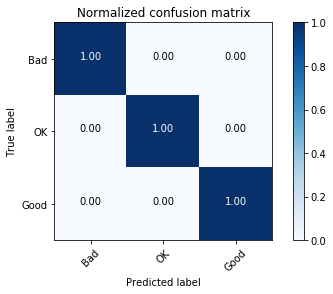

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_LR_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show();

Confusion matrix, without normalization
[[ 6586     0     0]
 [    0 28110     0]
 [    0     0   783]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


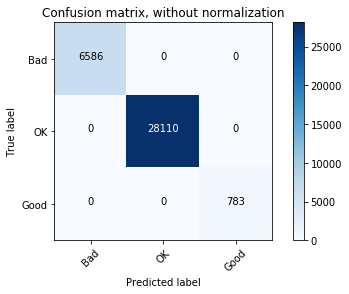

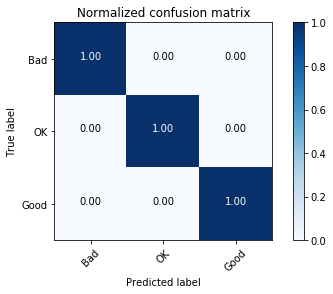

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_SVC_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show();

Confusion matrix, without normalization
[[ 6586     0     0]
 [    0 28110     0]
 [    0     0   783]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


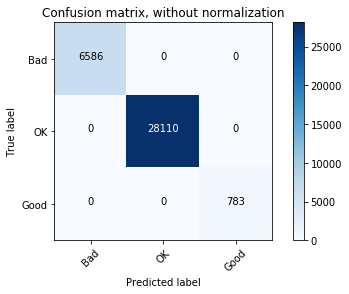

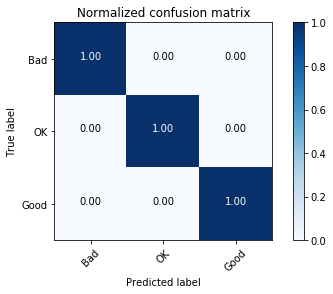

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_KNN_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show();